In [17]:

g_L=.003 #mS/mm^2
g_K=.36  #mS/mm^2
g_Na=1.2 #mS/mm^2
E_L=-54.387  #mV
E_K=-77 #mV
E_Na=50 #mV

getCurrent(-50,.1,.2,.3)

0.273867

## Step 1

Write a function for total current equation
$$I=g_L(V-E_L)+g_K n^4(V-E_K) + g_{Na} m^3h(V-E_{Na})   $$


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

g_L=.003 #mS/mm^2
g_K=.36  #mS/mm^2
g_Na=1.2 #mS/mm^2
E_L=-54.387  #mV
E_K=-77 #mV
E_Na=50 #mV
def getCurrent(V, n, m, h):
    I=  g_L*(V-E_L)  +  g_K*(n**4)*(V-E_K)   +   g_Na*(m**3)*h*(V-E_Na)
    return -I

In [19]:
import numpy as np
e=np.exp
e(7)

1096.6331584284585

## Step 2
Write functions for all the $\alpha(V)$ and $\beta(V)$ equations.  



$$ \alpha_n(V) = \dfrac{.01(V+55)}{1-e^{-.1(V+55)}} $$

$$ \beta_n(V) = 0.125e^{-0.0125(V+65)} $$

$$ \alpha_m(V) = \dfrac{.1(V+40)}{1-e^{-.1(V+40)}} $$

$$ \beta_m(V) = 4e^{-0.0556(V+65)} $$

$$ \alpha_h(V) = .07e^{-0.05(V+65)}  $$

$$ \beta_h(V) = \dfrac{1}{1+e^{-.1(V+35)}} $$



In [20]:
def alpha_n(V):
    return (.01*(V+55))/(1-np.exp(-.1*(V+55))) #from Dayan & Abbott
def beta_n(V):
    return 0.125*np.exp(-0.0125*(V+65)) #from Dayan & Abbott
def alpha_m(V):
    return (.1*(V+40))/(1-np.exp(-.1*(V+40))) #from Dayan & Abbott
def beta_m(V): 
    return 4*np.exp(-.0556*(V+65)) #from Dayan & Abbott
def alpha_h(V):
    return .07*np.exp(-.05*(V+65)) #from Dayan & Abbott
def beta_h(V):
    return 1./(1.+np.exp(-.1*(V+35))) #from Dayan & Abbott
alpha_n(-30), beta_n(-30), alpha_m(-30), beta_m(-30), alpha_h(-30), beta_h(-30)

(0.272356372458463,
 0.080706065803486507,
 1.5819767068693265,
 0.5713772303381649,
 0.012164176041531161,
 0.62245933120185459)

## Step 3

Write a function for the rate of change of the state of each subunit.  This function should take as inputs 1) the type of subunit, 2) the voltage, and 3) the current state.  It should output the rate the subunit is changing.  It should also call the functions written in step 2.

$$ \dfrac{dx}{dt} = \alpha_x(V)(1-x) - \beta_x(V)x $$

In [21]:
def getSubunitChangeRate(subunit_type,V,currState):
    if subunit_type=='n':
        alpha=alpha_n(V)
        beta=beta_n(V)
    elif subunit_type=='m':
        alpha=alpha_m(V)
        beta=beta_m(V)
    elif subunit_type=='h':
        alpha=alpha_h(V)
        beta=beta_h(V)
    return alpha*(1-currState)-beta*currState

## Step 4

Write a function that will get the voltage at the next step given the current voltage

$$C \dfrac{dV}{dt}=I$$

$$ dV=\dfrac{I*dt}{C}$$

set $C=.01$ nF/cm<sup>2</sup>

In [22]:
def updateVoltage(V_old,n,m,h,dt,external_current=0):
    C= .01 #nF/cm^2
    # for each subunit type, update the probability that subunit is in its 'open' conformation
    n=n+dt*getSubunitChangeRate('n',V_old,n)
    m=m+dt*getSubunitChangeRate('m',V_old,m)
    h=h+dt*getSubunitChangeRate('h',V_old,h)
    I=getCurrent(V_old,n,m,h)+external_current
    V_new=V_old+dt*(I/C)
    return V_new, n, m, h
    

In [ ]:
updateVoltage(v_old=1,n=2,m=3)

## Step 5
Plot an action potential

# Kyle's solutions
## Step 1

## Step 2

## Step 3

## Step 4

## Step 5

In [35]:
dt=.025
simTime=100
t=np.arange(0,simTime,dt)
V=np.zeros(len(t))
n=np.zeros(len(t))
m=np.zeros(len(t))
h=np.zeros(len(t))
external_current=np.zeros(len(t))
V[0]=-65
n[0]=0#alpha_n(V[0])/(alpha_n(V[0])+beta_n(V[0])) #this is the value at this voltage at t=infinity
m[0]=0#alpha_m(V[0])/(alpha_m(V[0])+beta_m(V[0])) #this is the value at this voltage at t=infinity
h[0]=0#alpha_h(V[0])/(alpha_h(V[0])+beta_h(V[0])) #this is the value at this voltage at t=infinity

#external_current[(t>5)*(t<6)]=.2
#external_current[(t>30)*(t<31)]=.2
#external_current[(t>50)*(t<80)]=.2

for i in range(1,len(V)):
    V[i],n[i],m[i],h[i]=updateVoltage(V[i-1],n[i-1],m[i-1],h[i-1],dt,external_current[i-1])

In [40]:
V=np.zeros(len(t))
V[1]=7
print(V)

[ 0.  7.  0. ...,  0.  0.  0.]


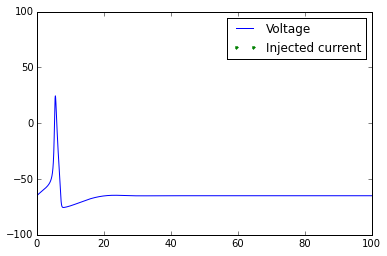

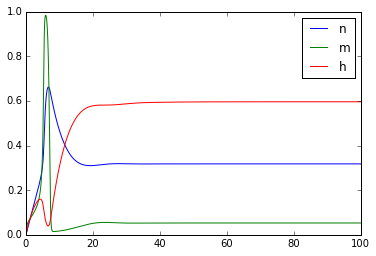

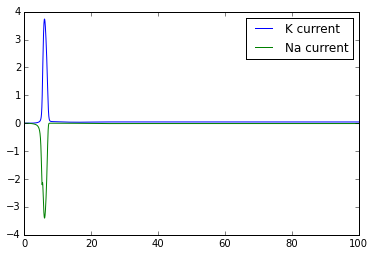

In [36]:
plt.plot(t,V)
t_current=t[external_current>0]
plt.plot(t_current,-90*np.ones(len(t_current)),linestyle='None',marker='.')
plt.axis([0,np.max(t),-100,100])
plt.legend(['Voltage','Injected current'])
plt.figure()
plt.plot(t,n)
plt.plot(t,m)
plt.plot(t,h)
plt.legend(['n','m','h'])
plt.figure()
plt.plot(t,g_K*(n**4)*(V-E_K) )
plt.plot(t,g_Na*(m**3)*h*(V-E_Na))
plt.legend(['K current','Na current'])

In [37]:
len(t)

4000